In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('digital_2axes.csv')

def process_timing(df):
    df.columns = ['t','v']
    df['v'] = df.v.astype(bool)
    df['v2'] =  df.shift().v 
    df['d'] = ((df.t - df.t.shift())*1e9).fillna(0).astype(int) # Time difference
    df = df.iloc[2:-1] # Drop all but first and last
    on_t = df[(df.v==False) & (df.v2 == True)] # On time == width of the pulses
    inter_t = df[(df.v== True) & (df.v2 == False)] # Off time == time between pulses == frequency
    
    return on_t, inter_t

on_t, inter_t = process_timing(df)
on_t.head(20)

,t,v,v2,d
2,0.001323,False,True,2000
4,0.001327,False,True,2000
6,0.003095,False,True,2000
8,0.004187,False,True,1999
10,0.005031,False,True,2000
12,0.005739,False,True,2000
14,0.006359,False,True,2000
16,0.006919,False,True,1999
18,0.007431,False,True,2000
20,0.007903,False,True,2000


In [3]:
on_t.d.describe()


count    192000.000000
mean       2042.192474
std         201.965608
min        1999.000000
25%        1999.000000
50%        2000.000000
75%        2000.000000
max        3000.000000
Name: d, dtype: float64

<AxesSubplot:>

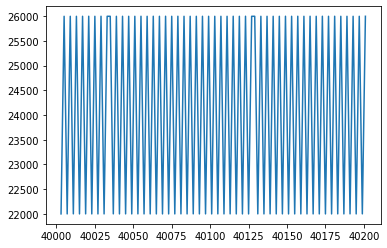

In [4]:
inter_t.d.iloc[20000:20100].plot()

<AxesSubplot:>

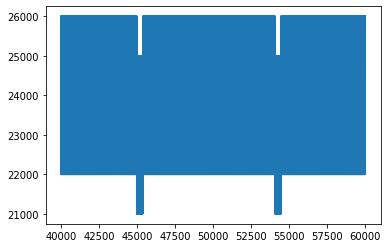

In [5]:
# Regular drop outs in the timing at about 45_000 and 54_000
inter_t.d.loc[40000:60000].plot()

<AxesSubplot:>

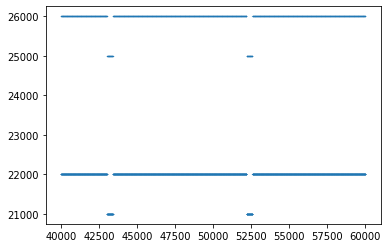

In [6]:
# Same when there is only one axis
df = pd.read_csv('digital_1axes.csv')

on_t, inter_t = process_timing(df)
inter_t.d.loc[40000:60000].plot(marker='.', markersize=.5, linestyle='none')

<AxesSubplot:>

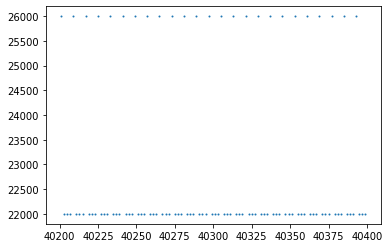

In [7]:
inter_t.d.loc[40200:40400].astype(int).plot(marker='.', markersize=2, linestyle='none')

In [12]:
# Expected period
1/(40_000)

2.5e-05

In [9]:
# Actual period
inter_t.d.loc[40000:100000].mean()/1e9

2.29536647e-05

In [10]:
1/2.5e-5

40000.0

<AxesSubplot:>

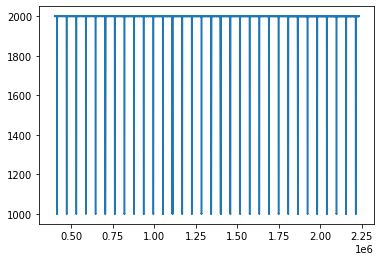

In [35]:
# One axis, maximum speed
df = pd.read_csv('digital_1axes_100k.csv')

on_t, inter_t = process_timing(df)
inter_t.d.iloc[200000:-50000].plot()

In [34]:
inter_t.d.iloc[200000:-20000].value_counts()

2000    490034
1999    429306
1000     27435
999      13856
Name: d, dtype: int64

In [24]:
inter_t.d.loc[2000:-2000]

Series([], Name: d, dtype: int64)

In [31]:
1/(2*1e-6)

500000.0

In [37]:
250_000 / 32 / 200 * 60 


2343.75